In [1]:
!pip install shap

   ---------------------------------------- 0.0/544.3 kB ? eta -:--:--
   ---------------------------------------- 544.3/544.3 kB 18.8 MB/s  0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 32.5 MB/s  0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   ----------------- ---------------------- 13.1/30.3 MB 68.3 MB/s eta 0:00:01
   ----------------------------------- ---- 26.7/30.3 MB 67.7 MB/s eta 0:00:01
   ---------------------------------------- 30.3/30.3 MB 60.1 MB/s  0:00:00

   -------- ------------------------------- 1/5 [llvmlite]
   -------- ------------------------------- 1/5 [llvmlite]
   ------------------------ --------------- 3/5 [numba]
   ------------------------ --------------- 3/5 [numba]
   ------------------------ --------------- 3/5 [numba]
   ------------------------ --------------- 3/5 [numba]
   ------------------------ --------------- 3/5 [numba]
   --

In [2]:
 !pip install pycaret

INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
   ---------------------------------------- 0.0/21.8 MB ? eta -:--:--
   ------------------ --------------------- 10.0/21.8 MB 47.8 MB/s eta 0:00:01
   ---------------------------------- ----- 18.9/21.8 MB 56.7 MB/s eta 0:00:01
   ---------------------------------------  21.8/21.8 MB 34.4 MB/s eta 0:00:01
   ---------------------------------------- 21.8/21.8 MB 32.8 MB/s  0:00:00
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------------- 7.5/7.5 MB 66.5 MB/s  0:00:00
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 10.7/10.7 MB 66.7 MB/s  0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------

In [3]:
!pip install ipywidgets

In [4]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [23]:
df_raw = pd.read_csv("C:\\Users\\user\\Downloads\\0821_v5_data.csv", encoding='CP949')

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14956 entries, 0 to 14955
Columns: 253 entries, id to hm_01_rel_t
dtypes: float64(1), int64(64), object(188)
memory usage: 28.9+ MB


In [7]:
df_raw.columns

Index(['id', 'burnout60', 'area', 'gender', 'age', 'wduration_y', 'earning1',
       'earning2_r', 'wtime_r', 'woutside4_1',
       ...
       'district', 'household', 'target', 'mode', 'hh_num', 'eli_num',
       'hm_01_gender', 'hm_01_year', 'hm_01_estat', 'hm_01_rel_t'],
      dtype='object', length=253)

In [8]:
df_raw['burnout60'].unique()

array(['lv1', 'lv2', 'lv3'], dtype=object)

In [9]:
# 타겟 클래스번호 전처리
df_raw['burnout60'] = df_raw['burnout60'].replace("lv1", 1)
df_raw['burnout60'] = df_raw['burnout60'].replace("lv2", 2)
df_raw['burnout60'] = df_raw['burnout60'].replace("lv3", 3)
df_raw['burnout60'].unique()

array([1, 2, 3], dtype=int64)

In [10]:
df_raw['burnout60'] = df_raw['burnout60'].astype('category')
print(df_raw["burnout60"])

0        1
1        2
2        1
3        1
4        1
        ..
14951    1
14952    2
14953    1
14954    1
14955    1
Name: burnout60, Length: 14956, dtype: category
Categories (3, int64): [1, 2, 3]


In [ ]:
# 열 확인차 돌린거라 안해도 됩니다

# df = df_raw.drop(['id', 'weng1', 'weng2', 'weng3', 'wsituation14', 'wwa2', 'sleep2', 'sleep3', 'weng4', 'weng5', 'wsituation1', 'wstat4', 'wsituation2', 'wsituation12', 'emp_manaqual1', 'wsituation10', 'wsituation9', 'occ', 'occ2', 'age'], axis = 1)

In [12]:
print("rows, cols:", df_raw.shape)

rows, cols: (14956, 253)


In [16]:
# 중복된 컬럼 이름 확인
duplicated_columns = df_raw.columns[df_raw.columns.duplicated()]
print("중복된 컬럼:", duplicated_columns.tolist())

중복된 컬럼: []


In [24]:
from pycaret.classification import *
from sklearn.preprocessing import *
# import imblearn
setup_clf = setup(df_raw, target = 'burnout60',
                  train_size = 0.8,
                #   ignore_features = None,
                #   numeric_features = ['age','fare'],
                #   categorical_features = categories,
                #   encoding_method = None,
                #   normalize = True,
                #   normalize_method = 'zscore',
                #   remove_outliers = True,
                #   feature_selection = True,
                #   feature_selection_method = 'classic',
                #   fix_imbalance = True,
                #   fix_imbalance_method = 'SMOTE',
                  fold=5,
                  n_jobs = - 1,
                  session_id = 1234)

,Description,Value
0,Session id,1234
1,Target,burnout60
2,Target type,Multiclass
3,Target mapping,"lv1: 0, lv2: 1, lv3: 2"
4,Original data shape,"(14956, 253)"
5,Transformed data shape,"(14956, 918)"
6,Transformed train set shape,"(11964, 918)"
7,Transformed test set shape,"(2992, 918)"
8,Numeric features,65
9,Categorical features,187


In [25]:
best = compare_models(fold=10, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8445,0.9467,0.8445,0.7663,0.7767,0.0381,0.1118,3.2960
et,Extra Trees Classifier,0.8551,0.9401,0.8551,0.8131,0.8029,0.1735,0.2654,3.4710
knn,K Neighbors Classifier,0.8314,0.6932,0.8314,0.7833,0.7962,0.1568,0.1795,3.5280
nb,Naive Bayes,0.8294,0.6852,0.8294,0.7584,0.7830,0.0867,0.1108,3.2600
lightgbm,Light Gradient Boosting Machine,0.8421,0.6105,0.8421,0.7091,0.7699,0.0000,0.0000,3.5300
dt,Decision Tree Classifier,0.8421,0.5000,0.8421,0.7091,0.7699,0.0000,0.0000,3.1100
dummy,Dummy Classifier,0.8421,0.5000,0.8421,0.7091,0.7699,0.0000,0.0000,3.2270
lr,Logistic Regression,0.8421,0.0000,0.8421,0.7091,0.7699,0.0000,0.0000,7.5870
svm,SVM - Linear Kernel,0.5709,0.0000,0.5709,0.5057,0.4975,0.0007,0.0020,3.9900
ridge,Ridge Classifier,0.8421,0.0000,0.8421,0.7228,0.7702,0.0015,0.0072,3.1530


#### 변수 중요도 확인

In [44]:
# 전체 데이터
X = df.drop(['burnout60'], axis = 1)
y = df['burnout60']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (14956, 354)
y 데이터:  (14956,)


In [45]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (10469, 354)
test 데이터:  (4487, 354)


In [46]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

# 매개변수 기본값 직접 확인해볼 것!
rf = RandomForestClassifier(n_jobs = -1, random_state=42)
scores = cross_validate(rf, X_train, y_train, return_train_score=True,
                        n_jobs = -1, cv = 10)

print(scores)

{'fit_time': array([1.36295223, 1.12079763, 1.07227778, 1.0306735 , 1.0306735 ,
       1.08627558, 1.06968307, 1.12079763, 1.12079763, 1.01475   ]), 'score_time': array([0.03321314, 0.06888866, 0.06608343, 0.1216855 , 0.10257792,
       0.04697585, 0.08267593, 0.06888866, 0.06888866, 0.11850142]), 'test_score': array([0.85100287, 0.86150907, 0.8443171 , 0.85100287, 0.85195798,
       0.85673352, 0.8548233 , 0.85004776, 0.86150907, 0.84703633]), 'train_score': array([0.99989387, 0.99978773, 0.99989387, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99989387, 1.        ])}


In [47]:
# 훈련 전체 데이터로 학습
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [48]:
f_imp_v = rf.feature_importances_
f_imp_v = pd.Series(f_imp_v, index = X.columns)
f_imp_v.sort_values(ascending = False).head(15)

wsituation8      0.021371
wsituation11     0.018987
wstat2           0.015876
emp_comp_ass1    0.014468
who1             0.014278
wsituation3      0.014265
wstat5           0.013808
wsituation13     0.013206
wstat1           0.012555
wsituation7      0.012255
wstat3           0.012132
who3             0.012105
emp_manaqual5    0.011791
emp_comp_ass6    0.010985
wsituation5      0.010635
dtype: float64

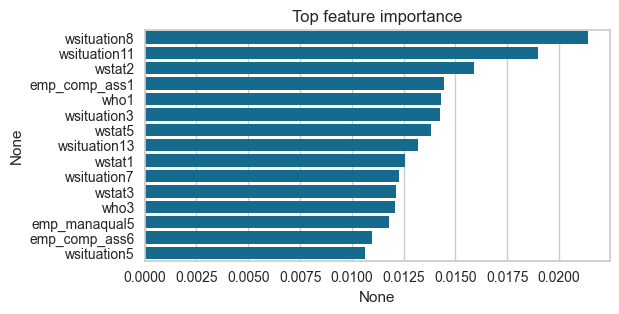

In [49]:
f_top = f_imp_v.sort_values(ascending = False).head(15)
plt.figure(figsize = (6, 3))
sns.barplot(x = f_top, y = f_top.index)
plt.title('Top feature importance')
plt.show()